# 1. 동적 스크래핑 
- 구글 코랩을 이용하여 스크래핑 해오기
- 클릭하면서 페이지 넘겨가며 데이터 수집


In [134]:
### 패키지 설치
# !pip install selenium
# !apt-get update
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin
 
# -*- coding: UTF-8 -*-

## import 
import time
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.



 
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)
 
#해당 url로 이동
url = "https://www.bigdata-map.kr/search/theme/list?searchKey=%EC%99%B8%EA%B5%AD%EC%9D%B8&reSearch=&history=&typeFilters=%EC%9D%BC%EB%B0%98(%ED%8C%8C%EC%9D%BC%EB%8D%B0%EC%9D%B4%ED%84%B0)&perPage=20&platformType=" 
driver.get(url)

#딜레이 줘서 페이지 잘 뜨게 대기
time.sleep(3)
data = []

#페이지 넘어가면서 확인하기 위해 반복문 사용
for i in range(int(740/20)+1):
  try:
    print(i)
    time.sleep(2)
    for num in range(1,20):
      #원하는 코드로 스크래핑
      update = driver.find_element(By.CSS_SELECTOR, f'#list-results-wrap > div:nth-child({num}) > p.title')
      #데이터중에 텍스트만 리스트에 넣음
      data.append(update.text)
    time.sleep(2)
    #다음 부분으로 클릭하기 위해 설정 , 클릭 잘 안될때가 있어서 엔터로 변경
    driver.find_element(By.CSS_SELECTOR, f'#hbs-target-search-pagination > div > a.btn-mob.next.page-link').send_keys(Keys.ENTER)
  except:
    print('에러')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
에러
33
에러
34
에러
35
에러
36
에러
37
에러


In [136]:
print(data[:10])
delete_word = ['외국인','외국','한국','현황','서울특별시','인천','법무부','별','광역시','특별자치도']
word = ''
for i in data:
  word = word+i
  for w in delete_word:
    word = word.replace(w,'')

['등록외국인', '법무부_외국인체류데이터(체류외국인관리)', '외국인인기식당', '외국인 활동 현황', '외국인 활동 현황', '외국인매출데이터', '법무부_13(단기체류외국인) 월별 단기체류 현황', '법무부_19(장단기체류외국인) 월별 체류외국인 현황', '법무부_26(장기체류외국인_등록) 월별 등록 현황', '(생활인구) 내국인, 장기체류 외국인, 단기체류']


# 2.  정적 스크래핑 
- request 를 이용해서 html을 받아와서 스크래핑


In [44]:
import requests
from bs4 import BeautifulSoup

url = "https://finance.naver.com/item/main.nhn?code=000660"

keyword = '외국'
keyword_list = []

for page in range(1,17):
  #url중에 변경되는 값만 바꾸게 하여 설정
  urlf = f'https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=FILE&keyword={keyword}&detailKeyword=&publicDataPk=&recmSe=&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=_score&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage={page}&perPage=40&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode='

  #html에서 파싱하도록 설정
  html = requests.get(urlf).text
  soup = BeautifulSoup(html, 'html.parser')

  for num in range(1,40):
    #원하는 부분만 셀렉트
    element = soup.select(f'#fileDataList > div.result-list > ul > li:nth-of-type({num}) > dl > dt > a > span.title')

    st = ""
    for i in element:
      if st != ' ':
        st= st+ i.text

    st = st.strip() #띄어쓰기 제거
    keyword_list.append(st)
    print(st)

법무부_49(외국국적동포) 월별 외국국적동포 국적(지역)별 체류 현황
한국전기안전공사_계측장비 외국산 현황
서울특별시_외국인과의 관계에 대한 태도 통계
산업통상자원부_외국인직접투자동향_외국인투자기업현황
산업통상자원부_외국인직접투자동향_도착액 외국인투자통계
한국산업인력공단_외국인근로자가 자주 쓰는 외국어(키르기스스탄)
한국산업인력공단_외국인근로자가 자주 쓰는 외국어(중국)
한국산업인력공단_외국인근로자가 자주 쓰는 외국어(우즈베키스탄)
한국산업인력공단_외국인근로자가 자주 쓰는 외국어(인도네시아)
한국산업인력공단_외국인근로자가 자주 쓰는 외국어(필리핀)
산업통상자원부_외국인직접투자동향_기간·산업별 외국인투자통계
산업통상자원부_외국인직접투자동향_기간·국가별 외국인투자통계
산업통상자원부_외국인직접투자동향_투자형태별 대한 외국인직접투자 통계
법무부_48(외국국적동포) 연도별 외국국적동포 체류 현황
법무부_50(외국국적동포) 월별 외국국적동포 체류자격별 현황
인사혁신처_외국공무원 교육운영 통계
산업통상자원부_외국인직접투자동향_국가별 산업별 대한 외국인직접투자 통계
산업통상자원부_외국인직접투자동향_제주도 외국인직접투자(FDI) 도착기준 현황
법무부_46(외국인 유학생) 연도별 외국인 유학생 체류 현황
전라북도_외국인과의혼인
법무부_47(외국인 유학생) 월별 외국인 유학생 국적(지역)별 현황
법무부_외국인체류데이터
산업통상자원부_외국인투자기업
제주특별자치도_외국인투자현황
제주특별자치도_외국인관광객현황
산업통상자원부_외국인직접투자동향_지자체별외국인투자현황
법무부_외국인체류데이터(체류외국인관리)
울산광역시_외국인지원기관현황
고용노동부_외국인고용허가정보
전라북도_혼인종류및외국인국적별혼인(외국인남편의국적)
제주특별자치도_외국인토지처분현황
제주특별자치도_외국인토지취득현황
행정안전부_외국인전용유흥음식점업
행정안전부_외국인관광도시민박업
제주특별자치도_외국어통역안내원배치현황
제주특별자치도_외국인전용기념품판매업정보
울산광역시_외국산차량등록현황
제주특별자치도_외국인환자유치의료기관현황
대구광역시

In [53]:
!pip install wordcloud
!pip install konlpy

from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
#특정 단어들만 지우기 위해 만들어놓음
delete_word = ['외국인','외국','한국','현황','서울특별시','인천','법무부','별','광역시','특별자치도']
word = ''
for i in keyword_list:
  word = word+i
  for d in delete_word:
    word = word.replace(d,"")

print(word)

#워드 클라우드를 위한 부분
- 워드 클라우드를 이미지와 출력으로 할 수 있게 만듬


/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


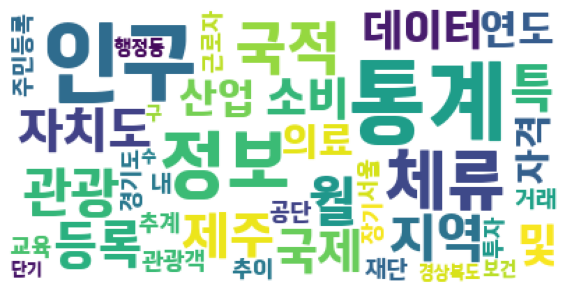

In [137]:
# open으로 txt파일을 열고 read()를 이용하여 읽는다.
text = word #문자열을 text에 넣어주면됨
 

twitter = Twitter()

# twitter함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = twitter.pos(text) 

noun_adj_list = []


# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)


# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 

import matplotlib.pyplot as plt


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(font_path='/content/SuseongDotum.ttf',background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('test.jpg')